In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn import manifold
from mlxtend.plotting import plot_decision_regions

In [4]:
X_train = pd.read_excel("X_train.xlsx")
y_train = pd.read_excel("y_train.xlsx")
X_test = pd.read_excel("X_test.xlsx")
y_test = pd.read_excel("y_test.xlsx")

y_train=np.array(y_train).reshape(y_train.shape[0],)

In [5]:
clf = GaussianNB().fit(X_train,y_train.ravel())

In [6]:
# All features combination
y_pred1 = clf.predict(X_test)

In [8]:
# Accuracy Score
print (metrics.accuracy_score(y_test, y_pred1))
# F1-Score
print (metrics.f1_score(y_test, y_pred1))

0.7250723798494499
0.6183279742765273


In [10]:
# Confusion Matrix
print (metrics.confusion_matrix(y_test, y_pred1))

[[4338 1041]
 [1333 1923]]


In [ ]:
# Decision Region
model_tSNE = TSNE(n_components=2,random_state=0)
tsne_data = model_tSNE.fit_transform(X_train)

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Text(0.5,1,'Gaussian Naive Bayes Decision Boundary')

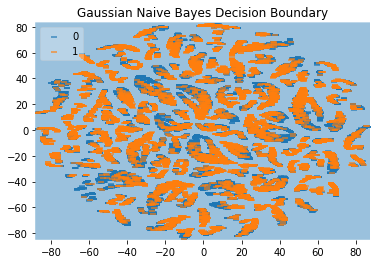

In [89]:
plot_decision_regions(tsne_data,y_train,clf=GaussianNB().fit(tsne_data,y_train),legend=2,markers='___')
plt.title("Gaussian Naive Bayes Decision Boundary")

In [7]:
import glob 
from nltk import sent_tokenize
import nltk

def get_document_without_heading(fname, is_summ = False):
    file = open(fname,"r") 
    line = file.read()
    sent_text = nltk.sent_tokenize(line)
    for sent in sent_text:
        if(len(sent) == 1):
            sent_text.remove(sent)
    if is_summ is False:
        heading = sent_text.pop(0)
        heading = heading.split('\n\n')
        if len(heading) > 1:
            sent_text.insert(0,heading[1])
    return sent_text

In [8]:
test_labels = y_pred4.copy()
data_paths = []
for path in glob.glob("updated_data/Test_Data/*.txt"):
    data_paths.append(path)
data_paths.sort()
for i in range(len(data_paths)):
    summ = ''
    p = data_paths[i].split("/")[-1]
    summ_path = "NB_Predicted_Summ/" + p
    original_doc = get_document_without_heading(data_paths[i], is_summ = False )
    doc_labels = test_labels[:len(original_doc)]
    test_labels = test_labels[len(original_doc):]
#     print(p)
#     print(len(original_doc))
#     print(len(doc_labels))
#     print("left is : " + str(len(test_labels)) + "\n")
    
    for i in range(len(original_doc)):
        if doc_labels[i] == 1:
            summ = summ + original_doc[i] + " "
    summ = summ[:-1]
    f = open(summ_path,'w')
    f.write(summ)
    f.close()

In [29]:
# Combination of Relevance and surface features
X_train = pd.read_excel("X_train.xlsx")
y_train = pd.read_excel("y_train.xlsx")
X_test = pd.read_excel("X_test.xlsx")
y_test = pd.read_excel("y_test.xlsx")

X_train = X_train.drop(["FreqWord_Uni"], axis=1)
X_train = X_train.drop(["FreqWord_Bi"], axis=1)
X_train = X_train.drop(["CentroidVar_Uni"], axis=1)
X_train = X_train.drop(["CentroidVar_Bi"], axis=1)
X_train = X_train.drop(["SigTerm_Uni"], axis=1)

X_test = X_test.drop(["FreqWord_Uni"], axis=1)
X_test = X_test.drop(["FreqWord_Bi"], axis=1)
X_test = X_test.drop(["CentroidVar_Uni"], axis=1)
X_test = X_test.drop(["CentroidVar_Bi"], axis=1)
X_test = X_test.drop(["SigTerm_Uni"], axis=1)

# X_test = X_test.drop(["FirstRel_Doc"], axis=1)
# X_test = X_test.drop(["FirstRel_Para"], axis=1)
# X_test = X_test.drop(["PageRankRel"], axis=1)

# X_test = X_test.drop(["Length"], axis=1)
# X_test = X_test.drop(["Quote"], axis=1)
# X_test = X_test.drop(["Position"], axis=1)
# X_test = X_test.drop(["Para_First"], axis=1)
# X_test = X_test.drop(["Doc_First"], axis=1)    

In [30]:
y_train=np.array(y_train).reshape(y_train.shape[0],)
clf = GaussianNB().fit(X_train,y_train.ravel())

In [31]:
y_pred2 = clf.predict(X_test)
# Accuracy Score
print (metrics.accuracy_score(y_test, y_pred2))
# F1-Score
print (metrics.f1_score(y_test, y_pred2))

0.6976259409380429
0.5074514242595737


In [32]:
# Confusion Matrix
print (metrics.confusion_matrix(y_test, y_pred2))

[[4679  700]
 [1911 1345]]


In [33]:
# Combination of Surface and Content features
X_train = pd.read_excel("X_train.xlsx")
X_test = pd.read_excel("X_test.xlsx")

X_train = X_train.drop(["FirstRel_Doc"], axis=1)
X_train = X_train.drop(["FirstRel_Para"], axis=1)
X_train = X_train.drop(["PageRankRel"], axis=1)

# X_test = X_test.drop(["FreqWord_Uni"], axis=1)
# X_test = X_test.drop(["FreqWord_Bi"], axis=1)
# X_test = X_test.drop(["CentroidVar_Uni"], axis=1)
# X_test = X_test.drop(["CentroidVar_Bi"], axis=1)
# X_test = X_test.drop(["SigTerm_Uni"], axis=1)

X_test = X_test.drop(["FirstRel_Doc"], axis=1)
X_test = X_test.drop(["FirstRel_Para"], axis=1)
X_test = X_test.drop(["PageRankRel"], axis=1)

# X_test = X_test.drop(["Length"], axis=1)
# X_test = X_test.drop(["Quote"], axis=1)
# X_test = X_test.drop(["Position"], axis=1)
# X_test = X_test.drop(["Para_First"], axis=1)
# X_test = X_test.drop(["Doc_First"], axis=1)

In [34]:
y_train=np.array(y_train).reshape(y_train.shape[0],)
clf = GaussianNB().fit(X_train,y_train.ravel())
y_pred3 = clf.predict(X_test)
# Accuracy Score
print (metrics.accuracy_score(y_test, y_pred3))
# F1-Score
print (metrics.f1_score(y_test, y_pred3))

0.6917197452229299
0.5897040690505548


In [36]:
# Confusion Matrix
print (metrics.confusion_matrix(y_test, y_pred3))

[[4060 1319]
 [1343 1913]]


In [5]:
# Combination of Relevance and Content features
X_train = pd.read_excel("X_train.xlsx")
X_test = pd.read_excel("X_test.xlsx")

X_train = X_train.drop(["Length"], axis=1)
X_train = X_train.drop(["Quote"], axis=1)
X_train = X_train.drop(["Position"], axis=1)
X_train = X_train.drop(["Para_First"], axis=1)
X_train = X_train.drop(["Doc_First"], axis=1)

# X_test = X_test.drop(["FreqWord_Uni"], axis=1)
# X_test = X_test.drop(["FreqWord_Bi"], axis=1)
# X_test = X_test.drop(["CentroidVar_Uni"], axis=1)
# X_test = X_test.drop(["CentroidVar_Bi"], axis=1)
# X_test = X_test.drop(["SigTerm_Uni"], axis=1)

# X_test = X_test.drop(["FirstRel_Doc"], axis=1)
# X_test = X_test.drop(["FirstRel_Para"], axis=1)
# X_test = X_test.drop(["PageRankRel"], axis=1)

X_test = X_test.drop(["Length"], axis=1)
X_test = X_test.drop(["Quote"], axis=1)
X_test = X_test.drop(["Position"], axis=1)
X_test = X_test.drop(["Para_First"], axis=1)
X_test = X_test.drop(["Doc_First"], axis=1)

In [6]:
y_train=np.array(y_train).reshape(y_train.shape[0],)
clf = GaussianNB().fit(X_train,y_train.ravel())
y_pred4 = clf.predict(X_test)
# Accuracy Score
print (metrics.accuracy_score(y_test, y_pred4))
# F1-Score
print (metrics.f1_score(y_test, y_pred4))

0.7471916618413433
0.6670733567180113


In [41]:
# Confusion Matrix
print (metrics.confusion_matrix(y_test, y_pred4))

[[4265 1114]
 [1069 2187]]


In [39]:
# Only Relevance features
X_train = pd.read_excel("X_train.xlsx")
X_test = pd.read_excel("X_test.xlsx")

X_train = X_train.drop(["Length"], axis=1)
X_train = X_train.drop(["Quote"], axis=1)
X_train = X_train.drop(["Position"], axis=1)
X_train = X_train.drop(["Para_First"], axis=1)
X_train = X_train.drop(["Doc_First"], axis=1)

X_train = X_train.drop(["FreqWord_Uni"], axis=1)
X_train = X_train.drop(["FreqWord_Bi"], axis=1)
X_train = X_train.drop(["CentroidVar_Uni"], axis=1)
X_train = X_train.drop(["CentroidVar_Bi"], axis=1)
X_train = X_train.drop(["SigTerm_Uni"], axis=1)

X_test = X_test.drop(["FreqWord_Uni"], axis=1)
X_test = X_test.drop(["FreqWord_Bi"], axis=1)
X_test = X_test.drop(["CentroidVar_Uni"], axis=1)
X_test = X_test.drop(["CentroidVar_Bi"], axis=1)
X_test = X_test.drop(["SigTerm_Uni"], axis=1)

# X_test = X_test.drop(["FirstRel_Doc"], axis=1)
# X_test = X_test.drop(["FirstRel_Para"], axis=1)
# X_test = X_test.drop(["PageRankRel"], axis=1)

X_test = X_test.drop(["Length"], axis=1)
X_test = X_test.drop(["Quote"], axis=1)
X_test = X_test.drop(["Position"], axis=1)
X_test = X_test.drop(["Para_First"], axis=1)
X_test = X_test.drop(["Doc_First"], axis=1)

In [46]:
y_train=np.array(y_train).reshape(y_train.shape[0],)
clf = GaussianNB().fit(X_train,y_train.ravel())
y_pred5 = clf.predict(X_test)
# Accuracy Score
print (metrics.accuracy_score(y_test, y_pred5))
# F1-Score
print (metrics.f1_score(y_test, y_pred5))

0.6946149392009264
0.6272791519434628


In [42]:
# Confusion Matrix
print (metrics.confusion_matrix(y_test, y_pred5))

[[4834  545]
 [1723 1533]]


In [43]:
# Only Content features
X_train = pd.read_excel("X_train.xlsx")
X_test = pd.read_excel("X_test.xlsx")

X_train = X_train.drop(["Length"], axis=1)
X_train = X_train.drop(["Quote"], axis=1)
X_train = X_train.drop(["Position"], axis=1)
X_train = X_train.drop(["Para_First"], axis=1)
X_train = X_train.drop(["Doc_First"], axis=1)

X_train = X_train.drop(["FirstRel_Doc"], axis=1)
X_train = X_train.drop(["FirstRel_Para"], axis=1)
X_train = X_train.drop(["PageRankRel"], axis=1)

# X_train = X_train.drop(["FreqWord_Uni"], axis=1)
# X_train = X_train.drop(["FreqWord_Bi"], axis=1)
# X_train = X_train.drop(["CentroidVar_Uni"], axis=1)
# X_train = X_train.drop(["CentroidVar_Bi"], axis=1)
# X_train = X_train.drop(["SigTerm_Uni"], axis=1)

# X_test = X_test.drop(["FreqWord_Uni"], axis=1)
# X_test = X_test.drop(["FreqWord_Bi"], axis=1)
# X_test = X_test.drop(["CentroidVar_Uni"], axis=1)
# X_test = X_test.drop(["CentroidVar_Bi"], axis=1)
# X_test = X_test.drop(["SigTerm_Uni"], axis=1)

X_test = X_test.drop(["FirstRel_Doc"], axis=1)
X_test = X_test.drop(["FirstRel_Para"], axis=1)
X_test = X_test.drop(["PageRankRel"], axis=1)

X_test = X_test.drop(["Length"], axis=1)
X_test = X_test.drop(["Quote"], axis=1)
X_test = X_test.drop(["Position"], axis=1)
X_test = X_test.drop(["Para_First"], axis=1)
X_test = X_test.drop(["Doc_First"], axis=1)

In [47]:
y_train=np.array(y_train).reshape(y_train.shape[0],)
clf = GaussianNB().fit(X_train,y_train.ravel())
y_pred6 = clf.predict(X_test)
# Accuracy Score
print (metrics.accuracy_score(y_test, y_pred6))
# F1-Score
print (metrics.f1_score(y_test, y_pred6))

0.6946149392009264
0.6272791519434628


In [54]:
# Confusion Matrix
print (metrics.confusion_matrix(y_test, y_pred6))

[[3779 1600]
 [1037 2219]]


In [52]:
# Only Surface features
X_train = pd.read_excel("X_train.xlsx")
X_test = pd.read_excel("X_test.xlsx")

# X_train = X_train.drop(["Length"], axis=1)
# X_train = X_train.drop(["Quote"], axis=1)
# X_train = X_train.drop(["Position"], axis=1)
# X_train = X_train.drop(["Para_First"], axis=1)
# X_train = X_train.drop(["Doc_First"], axis=1)

X_train = X_train.drop(["FirstRel_Doc"], axis=1)
X_train = X_train.drop(["FirstRel_Para"], axis=1)
X_train = X_train.drop(["PageRankRel"], axis=1)

X_train = X_train.drop(["FreqWord_Uni"], axis=1)
X_train = X_train.drop(["FreqWord_Bi"], axis=1)
X_train = X_train.drop(["CentroidVar_Uni"], axis=1)
X_train = X_train.drop(["CentroidVar_Bi"], axis=1)
X_train = X_train.drop(["SigTerm_Uni"], axis=1)

X_test = X_test.drop(["FreqWord_Uni"], axis=1)
X_test = X_test.drop(["FreqWord_Bi"], axis=1)
X_test = X_test.drop(["CentroidVar_Uni"], axis=1)
X_test = X_test.drop(["CentroidVar_Bi"], axis=1)
X_test = X_test.drop(["SigTerm_Uni"], axis=1)

X_test = X_test.drop(["FirstRel_Doc"], axis=1)
X_test = X_test.drop(["FirstRel_Para"], axis=1)
X_test = X_test.drop(["PageRankRel"], axis=1)

# X_test = X_test.drop(["Length"], axis=1)
# X_test = X_test.drop(["Quote"], axis=1)
# X_test = X_test.drop(["Position"], axis=1)
# X_test = X_test.drop(["Para_First"], axis=1)
# X_test = X_test.drop(["Doc_First"], axis=1)

In [53]:
y_train=np.array(y_train).reshape(y_train.shape[0],)
clf = GaussianNB().fit(X_train,y_train.ravel())
y_pred7 = clf.predict(X_test)
# Accuracy Score
print (metrics.accuracy_score(y_test, y_pred7))
# F1-Score
print (metrics.f1_score(y_test, y_pred7))

0.6331210191082802
0.38028169014084506


In [55]:
# Confusion Matrix
print (metrics.confusion_matrix(y_test, y_pred7))

[[4495  884]
 [2284  972]]
